In [1]:
#URLpointing to source of dataset 
#https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#a).Loading the data
dataset_url = ('C:/Users/ADMIN/downloads/breast cancer.csv')
df = pd.read_csv('C:/Users/ADMIN/downloads/breast cancer.csv')


In [3]:
#b). Display the data frame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#c). Display the first and last tuples of the data set
print("First tuples:")
print(df.head(1))
print("\nLast tuples:")
print(df.tail(1))

First tuples:
       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.1184            0.2776          0.3001               0.1471   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   

   fractal_dimension_worst  Unnamed: 32  
0                   0.1189          NaN  

[1 rows x 33 columns]

Last tuples:
        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
568  92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
568          0.

In [5]:
#d) Display the descriptive statistics
print(df.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [6]:
#e). Display the class label distribution
print(df['diagnosis'].value_counts())


B    357
M    212
Name: diagnosis, dtype: int64


<Axes: xlabel='diagnosis', ylabel='count'>

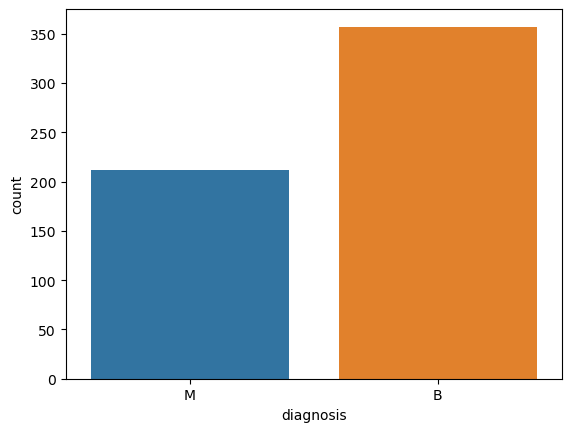

In [7]:
#f). Use seaborn to display count plot for the class label
sns.countplot(x='diagnosis', data=df)


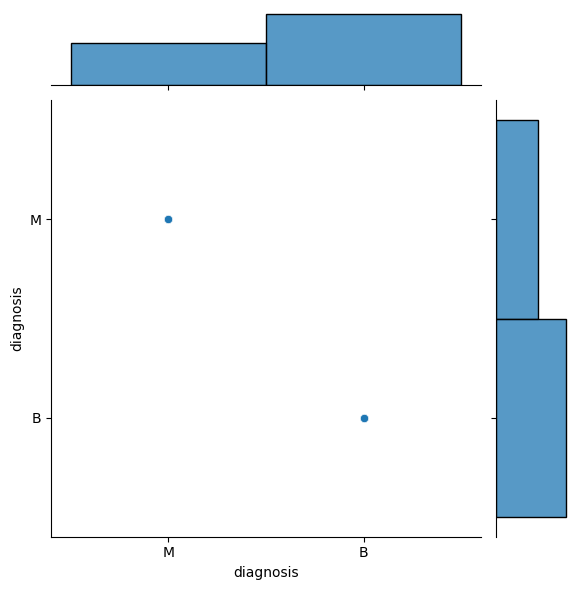

In [8]:
#g). Use seaborn to display a joint plot with any two variables of your choice
sns.jointplot(x='diagnosis', y='diagnosis', data=df)
plt.show()

In [9]:
#h)Determine based in the data set, whether you want to use category encoders
# Display information about the dataset to check the data types of your features to confirm if there are any categorical variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#since the dataset contains categorical values i.e diagnosis hence i will use category encoders
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])


In [12]:
# i) Split the data such that 25% is reserved testing
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
#Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [13]:
# j)show the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (426, 33) (426,)
Test set shape: (143, 33) (143,)


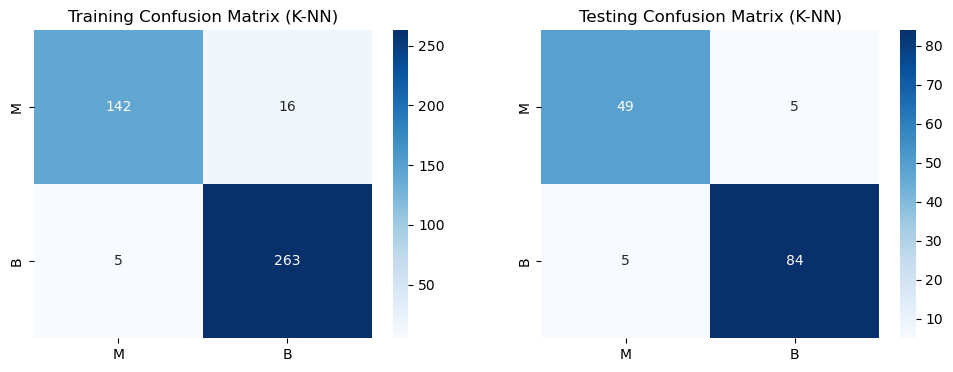

Training Accuracy (K-NN): 0.9507042253521126
Testing Accuracy (K-NN): 0.9300699300699301


In [17]:
# Train a model using K-NN 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Define class labels where m=malignant and b=benign
class_labels = ['M', 'B']

# Confusion matrix
conf_matrix_train_knn = confusion_matrix(y_train, y_train_pred_knn)
conf_matrix_test_knn = confusion_matrix(y_test, y_test_pred_knn)

# Heatmap for confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Training Confusion Matrix (K-NN)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Testing Confusion Matrix (K-NN)")

plt.show()

# Classification accuracy
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

# Compare training and testing accuracy
print("Training Accuracy (K-NN):", accuracy_train_knn)
print("Testing Accuracy (K-NN):", accuracy_test_knn)


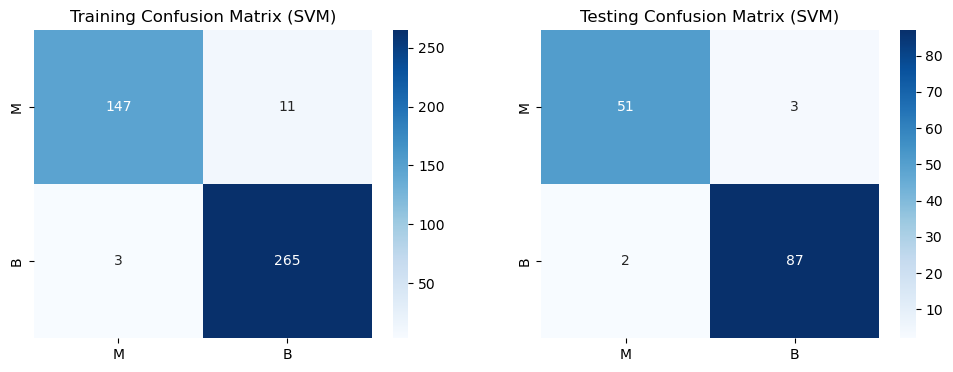

Training Accuracy (SVM): 0.9671361502347418
Testing Accuracy (SVM): 0.965034965034965


In [18]:
# Train a model using SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Confusion matrix
conf_matrix_train_svm = confusion_matrix(y_train, y_train_pred_svm)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

# Heatmap for confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Training Confusion Matrix (SVM)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Testing Confusion Matrix (SVM)")

plt.show()

# Classification accuracy
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)

# Compare training and testing accuracy
print("Training Accuracy (SVM):", accuracy_train_svm)
print("Testing Accuracy (SVM):", accuracy_test_svm)


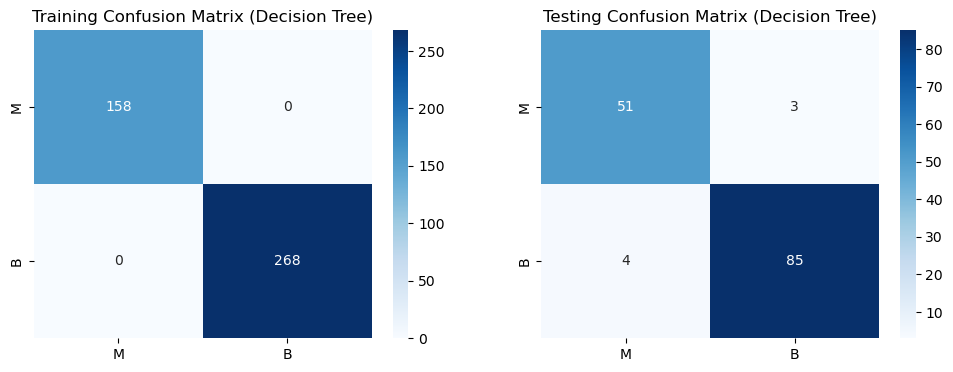

Training Accuracy (Decision Tree): 1.0
Testing Accuracy (Decision Tree): 0.951048951048951


In [19]:
# Train a model using Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Confusion matrix
conf_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
conf_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Heatmap for confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Training Confusion Matrix (Decision Tree)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Testing Confusion Matrix (Decision Tree)")

plt.show()

# Classification accuracy
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

# Compare training and testing accuracy
print("Training Accuracy (Decision Tree):", accuracy_train_dt)
print("Testing Accuracy (Decision Tree):", accuracy_test_dt)


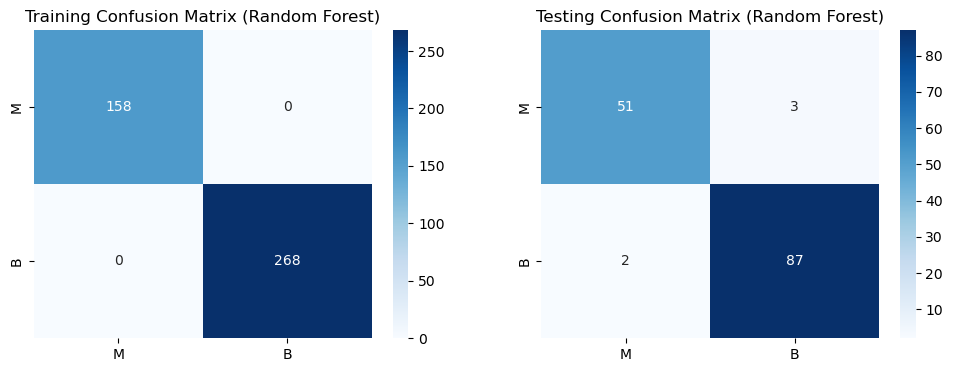

Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.965034965034965


In [20]:
# Train a model using Random Forest 
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Confusion matrix
conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Heatmap for confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Training Confusion Matrix (Random Forest)")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Testing Confusion Matrix (Random Forest)")

plt.show()

# Classification accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Compare training and testing accuracy
print("Training Accuracy (Random Forest):", accuracy_train_rf)
print("Testing Accuracy (Random Forest):", accuracy_test_rf)


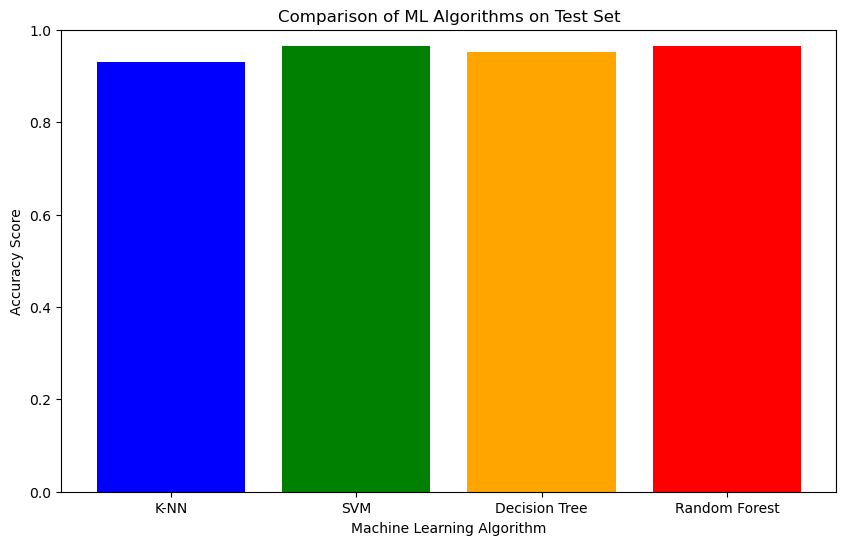

In [21]:
#demonstrating by way of a plot the ML algorithm which performs better from the results above.
# List of algorithms and their accuracies
algorithms = ['K-NN', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_test_knn, accuracy_test_svm, accuracy_test_dt, accuracy_test_rf]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Comparison of ML Algorithms on Test Set')
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1 for better visualization
plt.show()
